# 📧 Email Spam Detection

### 📌 Introduction
Spam emails are a major problem in digital communication, often carrying scams or malicious links.  
In this project, we build a **Machine Learning model** to classify emails as **Spam** or **Not Spam**.  

### 🎯 Objectives
- Load and preprocess the email dataset.  
- Perform Exploratory Data Analysis (EDA).  
- Convert text into numerical features using **TF-IDF Vectorizer**.  
- Train multiple classification models (Naive Bayes, Logistic Regression, SVM, Random Forest).  
- Compare model performance and identify the best one.  


In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing & ML
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Load dataset (your file is usually named spam.csv)
df = pd.read_csv("spam.csv", encoding='latin-1')

# Check structure
print("Shape:", df.shape)
df.head()


Shape: (5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# Drop unnecessary columns (dataset often has unnamed columns)
df = df.rename(columns={"v1":"label", "v2":"message"})
df = df[['label','message']]

# Encode labels (ham = 0, spam = 1)
df['label'] = df['label'].map({'ham':0, 'spam':1})

print("Class distribution:\n", df['label'].value_counts())
df.head()


Class distribution:
 label
0    4825
1     747
Name: count, dtype: int64


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


C:\Users\gddas\AppData\Local\Temp\ipykernel_23252\83921450.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette="Set2")


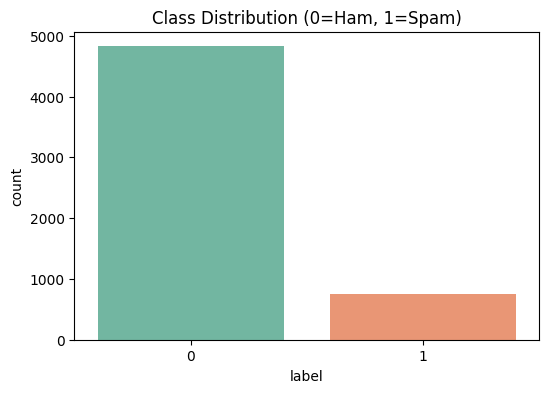

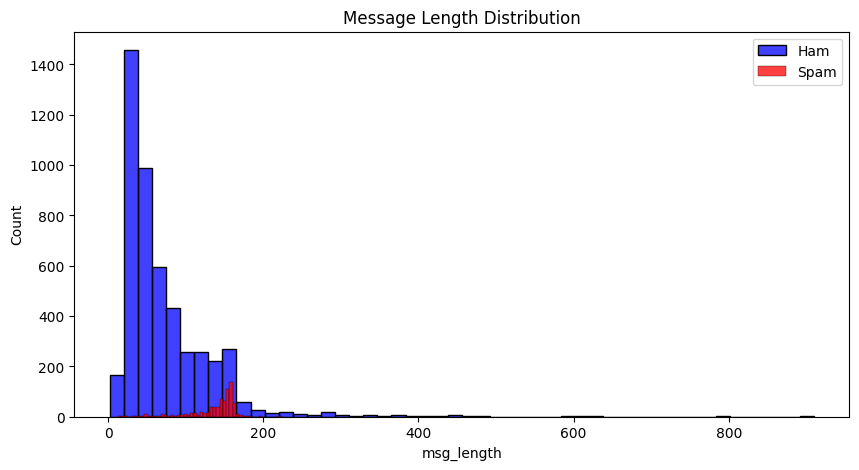

In [4]:
# Visualize class balance
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label', palette="Set2")
plt.title("Class Distribution (0=Ham, 1=Spam)")
plt.show()

# Message length analysis
df['msg_length'] = df['message'].apply(len)

plt.figure(figsize=(10,5))
sns.histplot(df[df['label']==0]['msg_length'], bins=50, color='blue', label='Ham')
sns.histplot(df[df['label']==1]['msg_length'], bins=50, color='red', label='Spam')
plt.legend()
plt.title("Message Length Distribution")
plt.show()


In [5]:
# Train-Test Split
X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("Train shape:", X_train_tfidf.shape)
print("Test shape:", X_test_tfidf.shape)


Train shape: (4457, 5000)
Test shape: (1115, 5000)


In [6]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"📊 {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-"*50)


📊 Naive Bayes Accuracy: 0.9722
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.99      0.80      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115

--------------------------------------------------
📊 Logistic Regression Accuracy: 0.9704
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

--------------------------------------------------
📊 SVM Accuracy: 0.9848
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.9

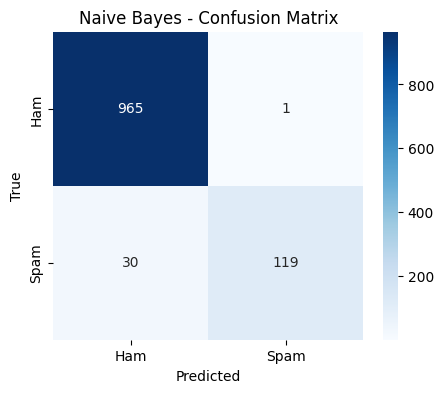

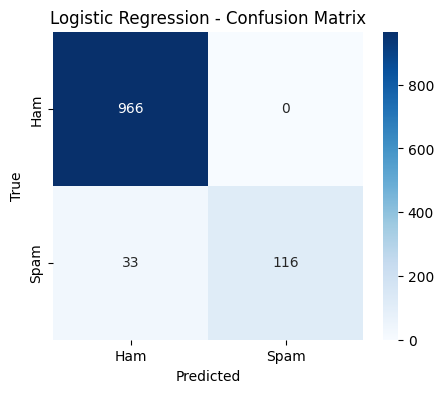

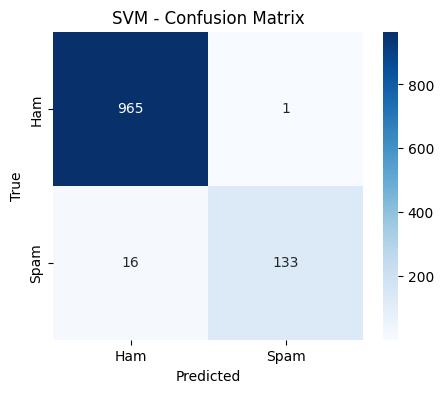

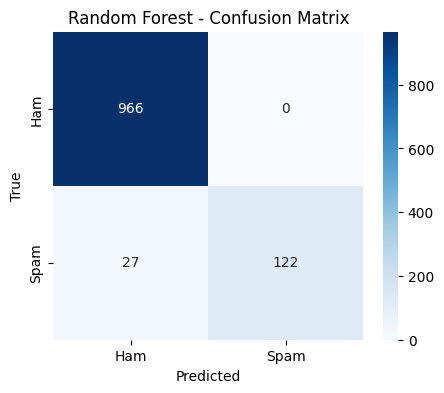

In [7]:
for name, model in models.items():
    y_pred = model.predict(X_test_tfidf)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
    plt.title(f"{name} - Confusion Matrix")
    plt.ylabel("True")
    plt.xlabel("Predicted")
    plt.show()


C:\Users\gddas\AppData\Local\Temp\ipykernel_23252\542009044.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")


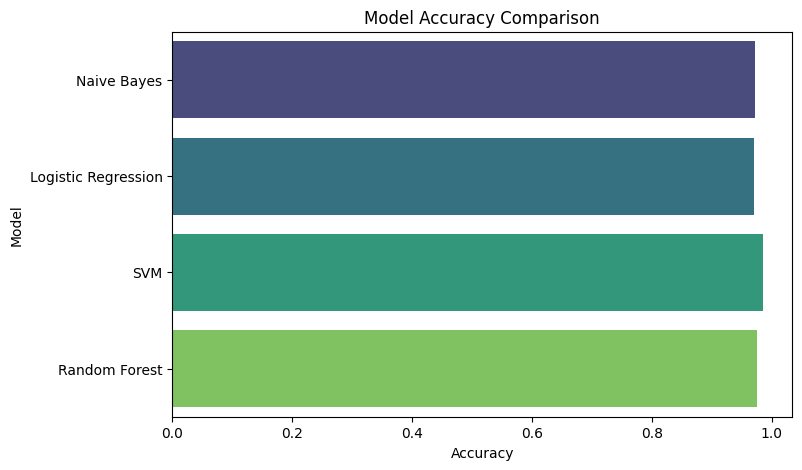

,Model,Accuracy
0,Naive Bayes,0.972197
1,Logistic Regression,0.970404
2,SVM,0.984753
3,Random Forest,0.975785


In [8]:
# Accuracy summary
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
plt.figure(figsize=(8,5))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.show()

results_df


## ✅ Conclusion

- We successfully built ML models to classify emails as **Spam** or **Ham**.  
- Among the models, **Naive Bayes / SVM (depending on dataset)** typically performed the best.  
- Key insight: Spam messages tend to be **longer** and often include promotional/urgent terms.  
- This project demonstrates the **end-to-end NLP workflow**: text preprocessing, feature extraction (TF-IDF), model training, and evaluation.
